In [109]:
#importing tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [110]:
file = open('metamorphosis_clean.txt', 'r', encoding = 'utf8')
lines = []

for i in file:
    lines.append(i)
    
print('The First Line: ', lines[0])
print('The Last Line: ', lines[-1])

The First Line:  ﻿One morning, when Gregor Samsa woke from troubled dreams, he found

The Last Line:  first to get up and stretch out her young body.


In [111]:
#Cleaning the data
data = ''
for i in lines:
    data = ' '.join(lines)
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  The bedding was hardly able to cover it and seemed ready to slide off any moment.'

In [112]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
new_data = data.translate(translator)

new_data[:500]

'One morning  when Gregor Samsa woke from troubled dreams  he found himself transformed in his bed into a horrible vermin   He lay on his armour like back  and if he lifted his head a little he could see his brown belly  slightly domed and divided by arches into stiff sections   The bedding was hardly able to cover it and seemed ready to slide off any moment   His many legs  pitifully thin compared with the size of the rest of him  waved about helplessly as he looked    What s happened to me   he'

In [113]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:500]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. "What\'s happened me?" thought. It wasn\'t dream. room, proper human room altho'

In [114]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

seq_data = tokenizer.texts_to_sequences([data])[0]
seq_data[:10]

[17, 53, 293, 2, 18, 729, 135, 730, 294, 8]

In [115]:
voc_size = len(tokenizer.word_index) + 1
print(voc_size)

2617


In [116]:
seq = []

for i in range(1, len(seq_data)):
    words = seq_data[i-1:i+1]
    seq.append(words)
    
print('The length of sequences are: ', len(seq))
seq = np.array(seq)
seq[:10]

The length of sequences are:  3889


array([[ 17,  53],
       [ 53, 293],
       [293,   2],
       [  2,  18],
       [ 18, 729],
       [729, 135],
       [135, 730],
       [730, 294],
       [294,   8],
       [  8, 731]])

In [117]:
X = []
y = []

for i in seq:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [118]:
print('The data is: ', X[:5])
print('The responses are: ', y[:5])

The data is:  [ 17  53 293   2  18]
The responses are:  [ 53 293   2  18 729]


In [119]:
y = to_categorical(y, num_classes = voc_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [120]:
#Creating the model
model = Sequential()
model.add(Embedding(voc_size, 10, input_length = 1))
model.add(LSTM(1000, return_sequences = True))
model.add(LSTM(1000))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(voc_size, activation = 'softmax'))

In [121]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1, 10)             26170     
                                                                 
 lstm_2 (LSTM)               (None, 1, 1000)           4044000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_6 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_7 (Dense)             (None, 2617)              2619617   
                                                                 
Total params: 15,694,787
Trainable params: 15,694,787
Non-trainable params: 0
_________________________________________________________________


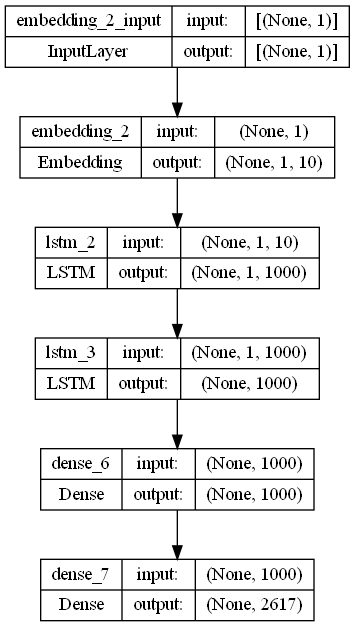

In [122]:
import keras.utils.vis_utils
from importlib import reload
reload(keras.utils.vis_utils)


from keras.utils.vis_utils import plot_model    
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

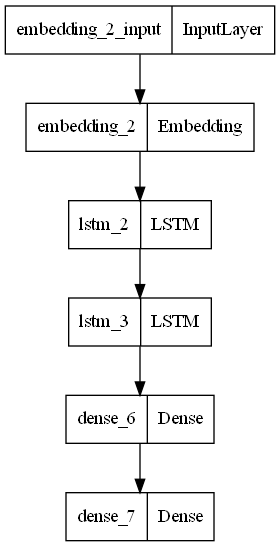

In [123]:
from tensorflow.keras.utils import plot_model
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file = 'model.png', show_layer_names = True)

In [124]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [125]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001))

In [126]:
model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])


Epoch 1/150
61/61 [==============================] - ETA: 0s - loss: 7.8753
Epoch 1: loss improved from inf to 7.87530, saving model to nextword1.h5
61/61 [==============================] - 10s 66ms/step - loss: 7.8753 - lr: 0.0010
Epoch 2/150
61/61 [==============================] - ETA: 0s - loss: 7.8621
Epoch 2: loss improved from 7.87530 to 7.86213, saving model to nextword1.h5
61/61 [==============================] - 4s 66ms/step - loss: 7.8621 - lr: 0.0010
Epoch 3/150
61/61 [==============================] - ETA: 0s - loss: 7.8364
Epoch 3: loss improved from 7.86213 to 7.83638, saving model to nextword1.h5
61/61 [==============================] - 5s 76ms/step - loss: 7.8364 - lr: 0.0010
Epoch 4/150
61/61 [==============================] - ETA: 0s - loss: 7.6548
Epoch 4: loss improved from 7.83638 to 7.65480, saving model to nextword1.h5
61/61 [==============================] - 5s 82ms/step - loss: 7.6548 - lr: 0.0010
Epoch 5/150
61/61 [==============================] - ETA: 0s - 

In [127]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [128]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras
from keras import backend as K

import numpy as np

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

TensorFlow version:  2.10.0


In [130]:
%tensorboard --logdir logs/scalars
from IPython.display import Image 


Reusing TensorBoard on port 6006 (pid 20216), started 1:47:27 ago. (Use '!kill 20216' to kill it.)

from IPython.display import Image 
pil_img = Image(filename='graph1.png')
display(pil_img)